In [3]:
# Introduction
## the dataset from kaggle from this link https://www.kaggle.com/datasets/anandshaw2001/video-game-sales?resource=download

In [5]:
# Question 


## 1) Most common game genres.

## 2) Top 10 best-selling games.

## 3) Platform with most games.

## 4) Genre with highest global sales. 

## 5) Total sales by region. 

## 6) Global sales over years.

## 7) Top 10 publishers by global sales.

## 8) Correlation between NA and EU sales.

## 9) Most popular genre in each region.

## 10) Average global sales per platform.

## 11) Top 10 games released after 2010 by sales. 

## 12) Top genres by average sales.
            
## 13) Correlation heatmap.

## 14) Distribution of sales per game.

## 15) Sales comparison of top 5 platforms.

In [7]:
# Import Library

In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [11]:
# Load the Data

In [13]:
df=pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [15]:
# Data Exploration

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [19]:
# Data Cleaning

In [21]:
# Drop rows with any missing values

In [45]:
df.dropna(inplace=True)
df = df[(df != 0).all(axis=1)]

In [47]:
# Remove duplicates if any

In [49]:
df.drop_duplicates(inplace=True)

In [51]:
# Convert 'Year' to int

In [53]:
df['Year'] = df['Year'].astype(int)

In [55]:
# Remove outliers: games with extremely high or zero sales

In [57]:
df = df[df['Global_Sales'] > 0]

In [59]:
# Reset index

In [61]:
df.reset_index(drop=True, inplace=True)

In [63]:
df[['Global_Sales', 'EU_Sales','JP_Sales', 'NA_Sales' ]].describe()

,Global_Sales,EU_Sales,JP_Sales,NA_Sales
count,2365.000000,2365.000000,2365.000000,2365.000000
mean,1.970195,0.575983,0.306410,0.904550
std,3.616289,1.168498,0.672373,1.903058
min,0.050000,0.010000,0.010000,0.010000
25%,0.430000,0.070000,0.030000,0.140000
50%,0.980000,0.220000,0.090000,0.370000
75%,2.090000,0.610000,0.280000,0.940000
max,82.740000,29.020000,10.220000,41.490000


In [65]:
# Question 

In [67]:
## 1. Most common game genres

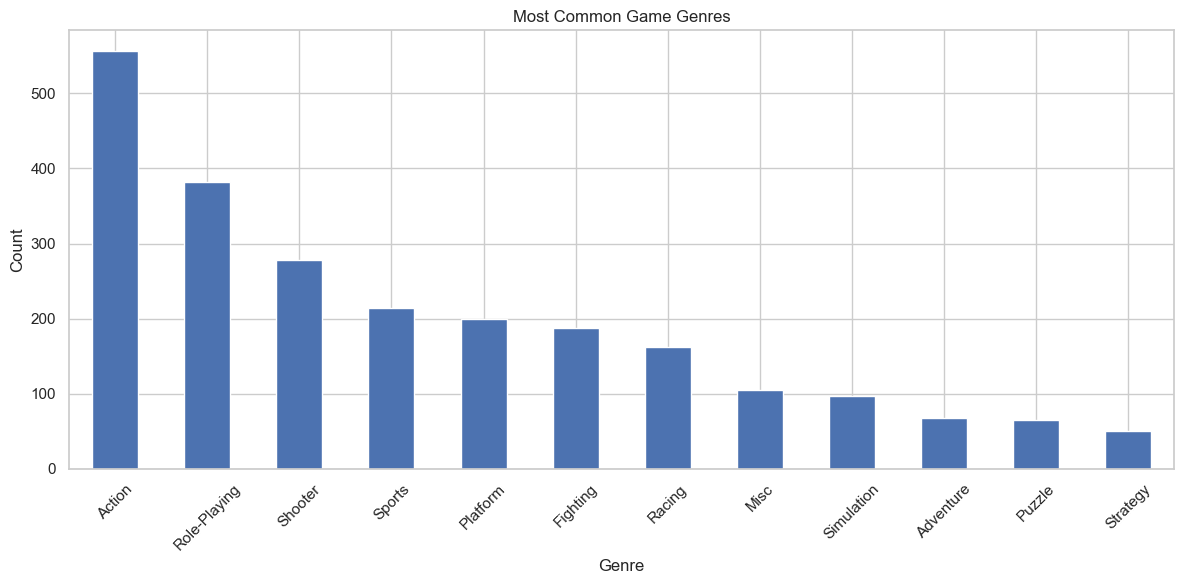

In [69]:
plt.figure(figsize=(12,6))
df['Genre'].value_counts().plot(kind='bar')
plt.title('Most Common Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
## 2. Top 10 best-selling games

In [73]:
print("\nTop 10 Games by Global Sales")
print(df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10))


Top 10 Games by Global Sales
                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


In [75]:
## 3. Platform with most games

In [77]:
print("\nTop Platforms by Number of Games")
print(df['Platform'].value_counts().head(10))


Top Platforms by Number of Games
Platform
PS3     433
X360    291
PS2     288
PS      192
DS      161
Wii     150
PS4     131
3DS     115
PSP     111
GBA      71
Name: count, dtype: int64


In [79]:
## 4. Genre with highest global sales

In [81]:
print("\nGlobal Sales by Genre")
print(df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False))


Global Sales by Genre
Genre
Action          923.75
Shooter         668.53
Role-Playing    607.17
Platform        592.07
Sports          542.87
Racing          393.00
Misc            282.87
Fighting        240.25
Simulation      154.70
Puzzle          133.98
Adventure        82.39
Strategy         37.93
Name: Global_Sales, dtype: float64


In [83]:
## 5. Total sales by region

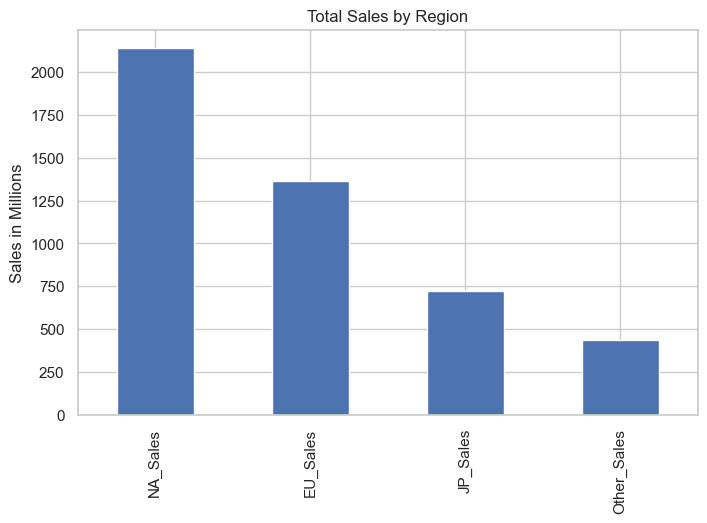

In [85]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales.plot(kind='bar', title='Total Sales by Region', figsize=(8,5))
plt.ylabel('Sales in Millions')
plt.show()

In [87]:
## 6. Global sales over years

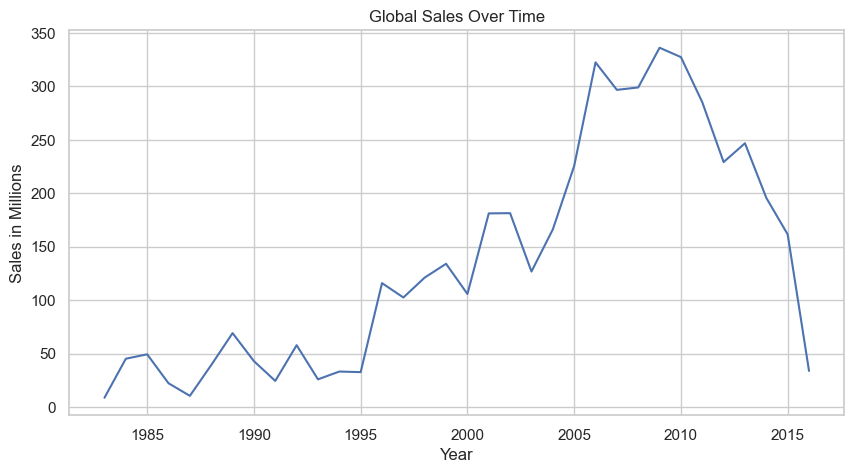

In [89]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year.plot(kind='line', title='Global Sales Over Time', figsize=(10,5))
plt.ylabel('Sales in Millions')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [91]:
## 7. Top 10 publishers by global sales

In [93]:
print("\nTop 10 Publishers by Global Sales")
print(df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10))


Top 10 Publishers by Global Sales
Publisher
Nintendo                        1676.67
Electronic Arts                  427.49
Sony Computer Entertainment      404.41
Activision                       301.82
Take-Two Interactive             249.54
Microsoft Game Studios           194.61
Ubisoft                          173.73
Capcom                           153.43
Konami Digital Entertainment     126.66
Sega                             125.29
Name: Global_Sales, dtype: float64


In [95]:
## 8. Correlation between NA and EU sales

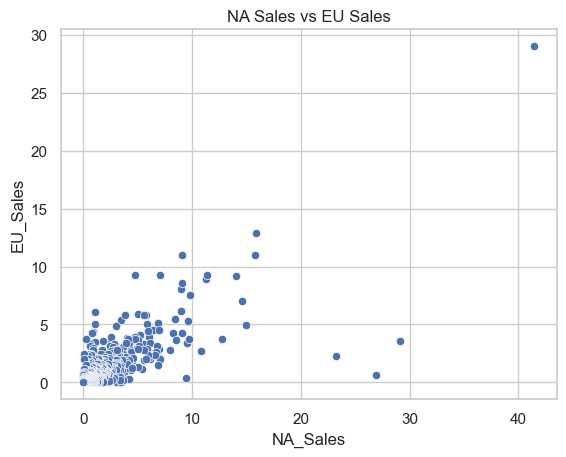

In [97]:
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df)
plt.title('NA Sales vs EU Sales')
plt.show()

In [99]:
## 9. Most popular genre in each region

In [101]:
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales']:
    print(f"\nTop Genres in {region}:")
    print(df.groupby('Genre')[region].sum().sort_values(ascending=False).head(5))



Top Genres in NA_Sales:
Genre
Action          423.47
Shooter         364.30
Platform        308.95
Role-Playing    234.72
Sports          214.68
Name: NA_Sales, dtype: float64

Top Genres in EU_Sales:
Genre
Action          293.05
Shooter         206.17
Sports          203.72
Role-Playing    137.60
Platform        137.32
Name: EU_Sales, dtype: float64

Top Genres in JP_Sales:
Genre
Role-Playing    193.91
Platform        111.27
Action           99.16
Sports           60.18
Fighting         47.51
Name: JP_Sales, dtype: float64


In [103]:
## 10. Average global sales per platform

In [105]:
print("\nAverage Global Sales by Platform")
print(df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False).head(10))


Average Global Sales by Platform
Platform
GB      5.020222
SNES    3.632581
NES     3.476379
Wii     3.289600
GEN     2.802857
DS      2.525342
N64     2.460179
XOne    2.191429
X360    2.000859
PS2     1.888785
Name: Global_Sales, dtype: float64


In [107]:
## 11. Top 10 games released after 2010 by sales

In [109]:
df_filtered = df[df['Year'] > 2010]

grouped = df_filtered.groupby('Name', as_index=False)['Global_Sales'].sum()

top_10_games = grouped.sort_values(by='Global_Sales', ascending=False).head(10)

print(top_10_games)

                               Name  Global_Sales
195              Grand Theft Auto V         49.76
64   Call of Duty: Modern Warfare 3         28.22
62       Call of Duty: Black Ops II         27.76
63             Call of Duty: Ghosts         23.79
61        Call of Duty: Black Ops 3         23.33
60   Call of Duty: Advanced Warfare         17.18
287                       Minecraft         15.90
465     The Elder Scrolls V: Skyrim         15.40
152                         FIFA 14         14.61
35                    Battlefield 3         14.57


In [111]:
## 12. Top genres by average sales

In [113]:
genre_avg_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print("\nAverage Sales by Genre")
print(genre_avg_sales)


Average Sales by Genre
Genre
Platform        2.975226
Misc            2.694000
Sports          2.536776
Racing          2.425926
Shooter         2.404784
Puzzle          2.061231
Action          1.661421
Simulation      1.594845
Role-Playing    1.589450
Fighting        1.277926
Adventure       1.211618
Strategy        0.743725
Name: Global_Sales, dtype: float64


In [115]:
## 13. Correlation heatmap

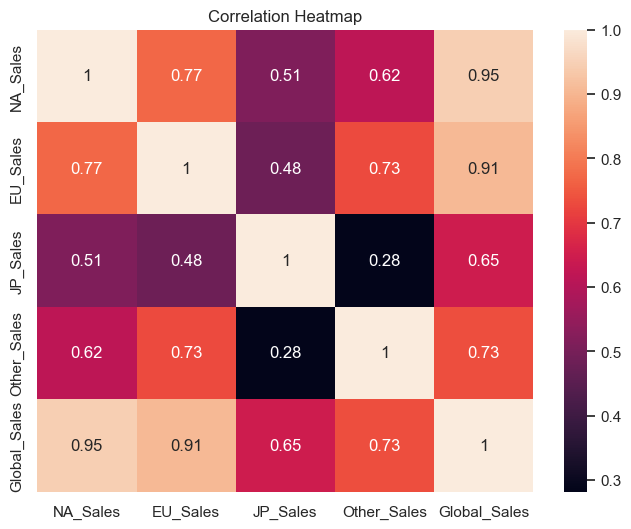

In [117]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [119]:
## 14. Distribution of sales per game

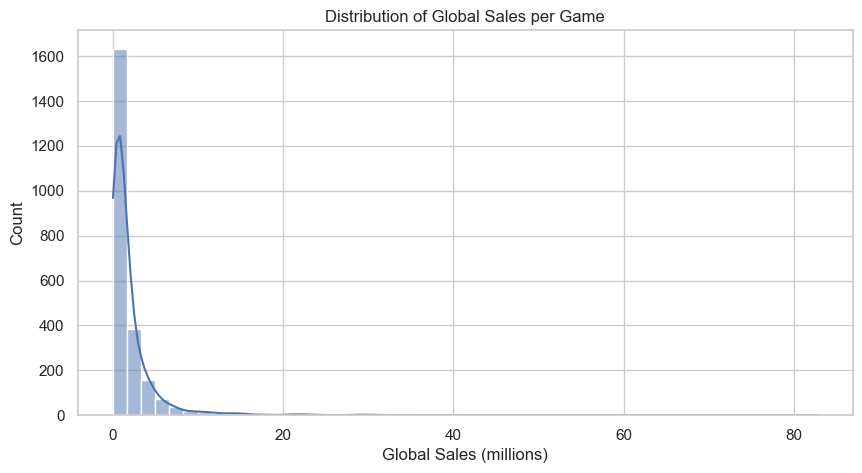

In [121]:
plt.figure(figsize=(10,5))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales per Game')
plt.xlabel('Global Sales (millions)')
plt.show()

In [123]:
## 15. Sales comparison of top 5 platforms

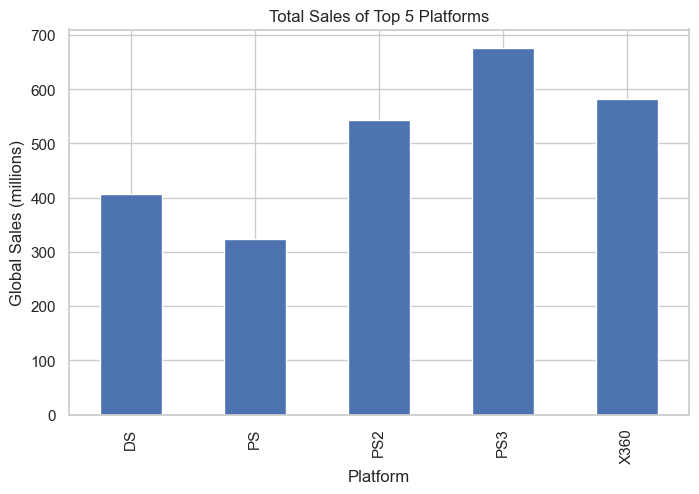

In [125]:
top_platforms = df['Platform'].value_counts().head(5).index
top_platform_sales = df[df['Platform'].isin(top_platforms)].groupby('Platform')['Global_Sales'].sum()
top_platform_sales.plot(kind='bar', title='Total Sales of Top 5 Platforms', figsize=(8,5))
plt.ylabel('Global Sales (millions)')
plt.show()